In [104]:
import pandas 
# Read the CSV file
bankrupt = pandas.read_csv("bankrupt.txt", sep=",")


In [105]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\DELL


In [106]:

# Using the shape attribute to find the number of observations and variables
num_observations = bankrupt.shape
variables = bankrupt.columns
print("Number of observations:",num_observations)
#print("variables in the Dataframe:", variables)

Number of observations: (6819, 96)


In [107]:
# Calculate descriptive statistics using describe()
statistics = bankrupt.describe()
print("\nDescriptive  Statistics:")
print(statistics)


Descriptive  Statistics:
         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%

In [129]:
# Use value_counts() to count the unique values in the target variable
value_counts = bankrupt[target_variable].value_counts()

#print(value_counts)

# Get the number of companies that went bankrupt (assuming 'Bankrupt' is encoded as 1)
num_bankrupt = value_counts.get(1, 0)  # Get the count of 1's (companies that went bankrupt)

# Calculate the percentage of companies that went bankrupt
percentage_bankrupt = (num_bankrupt / len(bankrupt)) * 100

# Check if the dataset is balanced
is_balanced = value_counts.min() / value_counts.max() > 0.5  # Adjust the threshold as needed

# Print the results
print(f"is_balanced: {is_balanced}")
print(f"Number of companies that went bankrupt: {num_bankrupt}")
print(f"Percentage of companies that went bankrupt: {percentage_bankrupt:.2f}%")
print(f"Is the dataset balanced? {'Yes' if is_balanced else 'No'}")

is_balanced: False
Number of companies that went bankrupt: 220
Percentage of companies that went bankrupt: 3.23%
Is the dataset balanced? No


In [130]:

import pandas as pd

# Import the train and test datasets
x_train = pd.read_csv("x_train.csv", index_col=0)
x_test = pd.read_csv("x_test.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)

# Display the number of observations in each dataset
num_observations_train_x = x_train.shape[0]
num_observations_test_x = x_test.shape[0]
num_observations_train_y = y_train.shape[0]
num_observations_test_y = y_test.shape[0]

print("Number of Observations in x Train Data:", num_observations_train_x)
print("Number of Observations in x Test Data:", num_observations_test_x)
print("Number of Observations in y Train Data:", num_observations_train_y)
print("Number of Observations in y Test Data:", num_observations_test_y)

# Check the distribution of classes in the target variable in both datasets
target_variable_train = "Bankrupt"
target_variable_test = "Bankrupt"

bankrupt_counts_train = y_train[target_variable_train].value_counts()
bankrupt_counts_test = y_test[target_variable_test].value_counts()

print("\nDistribution of Classes in Train Data:")
print(bankrupt_counts_train)

print("\nDistribution of Classes in Test Data:")
print(bankrupt_counts_test)


Number of Observations in x Train Data: 5455
Number of Observations in x Test Data: 1364
Number of Observations in y Train Data: 5455
Number of Observations in y Test Data: 1364

Distribution of Classes in Train Data:
0    5281
1     174
Name: Bankrupt, dtype: int64

Distribution of Classes in Test Data:
0    1318
1      46
Name: Bankrupt, dtype: int64


In [99]:
# Calculate proportions in both datasets
proportions_train = bankrupt_counts_train / num_observations_train
proportions_test = bankrupt_counts_test / num_observations_test

# Check if the distribution is similar
is_distribution_similar = proportions_train.equals(proportions_test)

print("\nIs the Distribution of Classes Similar in Both Data Sets?", is_distribution_similar)



Is the Distribution of Classes Similar in Both Data Sets? False


In [100]:
#Logistic Regression

import statsmodels.api as sm
import statsmodels.formula.api as smf
#import pandas as pd

# Concatenate x_train and y_train
bankrupt_train = pd.concat([x_train, y_train], axis=1)

# Define the logistic regression model
model_formula = "Bankrupt ~ ROAC + ROAA + ROAB + TRA + TAGR + DR + WKTA + CTA + CLA + CFOA + CLCA + NITA"

# Fit logistic regression model
logit_model = smf.glm(formula=model_formula, data=bankrupt_train, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(logit_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                            GLM   Df Residuals:                     5443
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -513.79
Date:                Fri, 13 Oct 2023   Deviance:                       1027.6
Time:                        20:51:37   Pearson chi2:                 4.44e+06
No. Iterations:                    10   Pseudo R-squ. (CS):            0.08988
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0644      3.655      1.659      0.0

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the estimated probabilities
yhat_logreg_probs = logit_model.fittedvalues

# Convert probabilities to binary class labels using a threshold of 0.5
yhat = [1 if x > 0.5 else 0 for x in yhat_logreg_probs]

# Print the confusion matrix
conf_matrix = confusion_matrix(bankrupt_train['Bankrupt'], yhat)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(bankrupt_train['Bankrupt'], yhat, digits=3)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[5266   15]
 [ 143   31]]

Classification Report:
              precision    recall  f1-score   support

           0      0.974     0.997     0.985      5281
           1      0.674     0.178     0.282       174

    accuracy                          0.971      5455
   macro avg      0.824     0.588     0.634      5455
weighted avg      0.964     0.971     0.963      5455



In [80]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already fitted the logistic regression model 'logit_model'
# and you have the train data 'bankrupt_train'

# Get the estimated probabilities
yhat_logreg_probs = logit_model.fittedvalues

# Convert probabilities to binary class labels using a threshold of 0.5
yhat = [1 if x > 0.5 else 0 for x in yhat_logreg_probs]

# Print the confusion matrix
conf_matrix = confusion_matrix(bankrupt_train['Bankrupt'], yhat)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(bankrupt_train['Bankrupt'], yhat, digits=3)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[5266   15]
 [ 143   31]]

Classification Report:
              precision    recall  f1-score   support

           0      0.974     0.997     0.985      5281
           1      0.674     0.178     0.282       174

    accuracy                          0.971      5455
   macro avg      0.824     0.588     0.634      5455
weighted avg      0.964     0.971     0.963      5455



In [81]:

# Get the estimated probabilities for the test set
yhat_test_logreg_probs = logit_model.predict(x_test)

# Convert probabilities to binary class labels using a threshold of 0.5
yhat_test = [1 if x > 0.5 else 0 for x in yhat_test_logreg_probs]

# Print the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, yhat_test)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

# Print the classification report for the test set
class_report_test = classification_report(y_test, yhat_test, digits=3)
print("\nClassification Report for Test Set:")
print(class_report_test)


Confusion Matrix for Test Set:
[[1306   12]
 [  39    7]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0      0.971     0.991     0.981      1318
           1      0.368     0.152     0.215        46

    accuracy                          0.963      1364
   macro avg      0.670     0.572     0.598      1364
weighted avg      0.951     0.963     0.955      1364



In [82]:
# K-NEAREST NEIGHBOUR

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a KNN classifier with K = 1
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the KNN model on the training set
knn_model.fit(x_train, y_train)

# Make predictions on the test set
yhat_knn = knn_model.predict(x_test)

# Print the confusion matrix for the test set
conf_matrix_knn = confusion_matrix(y_test, yhat_knn)
print("Confusion Matrix for KNN Model:")
print(conf_matrix_knn)

# Print the classification report for the test set
class_report_knn = classification_report(y_test, yhat_knn, digits=3)
print("\nClassification Report for KNN Model:")
print(class_report_knn)



Confusion Matrix for KNN Model:
[[1287   31]
 [  40    6]]

Classification Report for KNN Model:
              precision    recall  f1-score   support

           0      0.970     0.976     0.973      1318
           1      0.162     0.130     0.145        46

    accuracy                          0.948      1364
   macro avg      0.566     0.553     0.559      1364
weighted avg      0.943     0.948     0.945      1364



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [83]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Replace this line if your data loading is different
y_train = np.ravel(y_train)

# Create a KNN classifier with K = 1
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the KNN model on the training set
knn_model.fit(x_train, y_train)

# Now you can make predictions and evaluate the model


KNeighborsClassifier(n_neighbors=1)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Having 'x_train' and 'y_train' as training data
# Having 'x_test' and 'y_test' as your testing data

best_k = None
best_balanced_accuracy = 0

for k in range(1, 21):
    # Create a KNN classifier with the current value of K
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model on the training set
    knn_model.fit(x_train, np.ravel(y_train))
    
    # Make predictions on the test set
    yhat_knn = knn_model.predict(x_test)
    
    # Calculate balanced accuracy for the current K
    current_balanced_accuracy = balanced_accuracy_score(y_test, yhat_knn)
    
    # Print or store the balanced accuracy for each K (optional)
    print(f'K = {k}, Balanced Accuracy = {current_balanced_accuracy}')
    
    # Check if the current model has a higher balanced accuracy
    if current_balanced_accuracy > best_balanced_accuracy:
        best_balanced_accuracy = current_balanced_accuracy
        best_k = k

# Fit the best model (with the chosen K) on the entire training set
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(x_train, np.ravel(y_train))

# Make predictions on the test set with the best model
yhat_best_knn = best_knn_model.predict(x_test)

# Calculate performance indicators, confusion matrix, and classification report
conf_matrix_best_knn = confusion_matrix(y_test, yhat_best_knn)
class_report_best_knn = classification_report(y_test, yhat_best_knn, digits=3)

# Print the results
print(f'\nBest K: {best_k}')
print('Confusion Matrix for Best KNN Model:')
print(conf_matrix_best_knn)
print('\nClassification Report for Best KNN Model:')
print(class_report_best_knn)


K = 1, Balanced Accuracy = 0.5534571485122386
K = 2, Balanced Accuracy = 0.5089727518638253
K = 3, Balanced Accuracy = 0.5396846341624332
K = 4, Balanced Accuracy = 0.510110839875965
K = 5, Balanced Accuracy = 0.5097314772052517
K = 6, Balanced Accuracy = 0.5097314772052517
K = 7, Balanced Accuracy = 0.5097314772052517
K = 8, Balanced Accuracy = 0.5097314772052517
K = 9, Balanced Accuracy = 0.5097314772052517
K = 10, Balanced Accuracy = 0.5097314772052517
K = 11, Balanced Accuracy = 0.5097314772052517
K = 12, Balanced Accuracy = 0.5
K = 13, Balanced Accuracy = 0.4996206373292868
K = 14, Balanced Accuracy = 0.5
K = 15, Balanced Accuracy = 0.4988619119878604
K = 16, Balanced Accuracy = 0.5
K = 17, Balanced Accuracy = 0.5
K = 18, Balanced Accuracy = 0.5
K = 19, Balanced Accuracy = 0.5
K = 20, Balanced Accuracy = 0.5

Best K: 1
Confusion Matrix for Best KNN Model:
[[1287   31]
 [  40    6]]

Classification Report for Best KNN Model:
              precision    recall  f1-score   support

  

In [85]:
# DISCRIMINANT ANALYSIS

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'x_train' and 'y_train' are your training data
# Assuming 'x_test' and 'y_test' are your testing data

# Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, np.ravel(y_train))
yhat_lda = lda_model.predict(x_test)

# Quadratic Discriminant Analysis (QDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, np.ravel(y_train))
yhat_qda = qda_model.predict(x_test)

# Evaluate LDA
conf_matrix_lda = confusion_matrix(y_test, yhat_lda)
class_report_lda = classification_report(y_test, yhat_lda, digits=3)

# Evaluate QDA
conf_matrix_qda = confusion_matrix(y_test, yhat_qda)
class_report_qda = classification_report(y_test, yhat_qda, digits=3)

# Print the results
print('Linear Discriminant Analysis (LDA):')
print('Confusion Matrix:')
print(conf_matrix_lda)
print('Classification Report:')
print(class_report_lda)

print('\nQuadratic Discriminant Analysis (QDA):')
print('Confusion Matrix:')
print(conf_matrix_qda)
print('Classification Report:')
print(class_report_qda)

print(lda_model.priors_)
print(lda_model.means_)


Linear Discriminant Analysis (LDA):
Confusion Matrix:
[[1299   19]
 [  31   15]]
Classification Report:
              precision    recall  f1-score   support

           0      0.977     0.986     0.981      1318
           1      0.441     0.326     0.375        46

    accuracy                          0.963      1364
   macro avg      0.709     0.656     0.678      1364
weighted avg      0.959     0.963     0.961      1364


Quadratic Discriminant Analysis (QDA):
Confusion Matrix:
[[1280   38]
 [  30   16]]
Classification Report:
              precision    recall  f1-score   support

           0      0.977     0.971     0.974      1318
           1      0.296     0.348     0.320        46

    accuracy                          0.950      1364
   macro avg      0.637     0.659     0.647      1364
weighted avg      0.954     0.950     0.952      1364

[0.96810266 0.03189734]
[[5.07499371e-01 5.61487295e-01 5.56092411e-01 1.17719099e-01
  5.55001102e+09 1.11500340e-01 8.15420501e-01 1

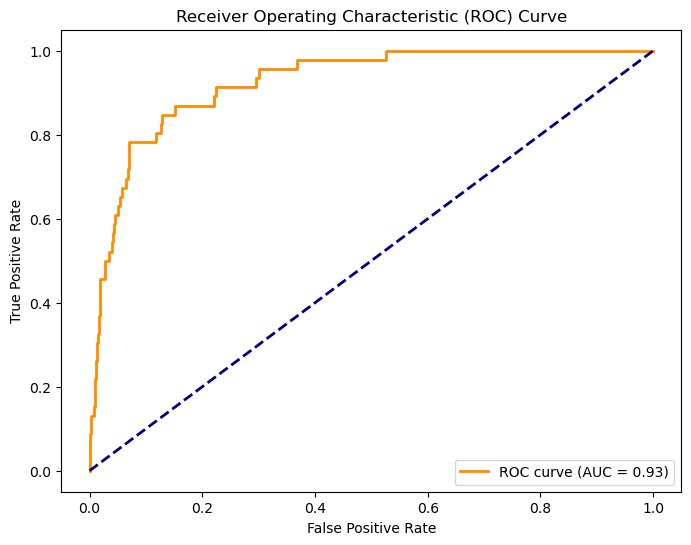

Area Under the Curve (AUC): 0.93


In [86]:
# ROC (Receiver Operating Characteristic) Curve

from sklearn.metrics import roc_curve, auc

# Assuming lda_model is your trained Linear Discriminant Analysis (LDA) model
lda_scores = lda_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lda_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC
print('Area Under the Curve (AUC): {:.2f}'.format(roc_auc))


In [133]:
from sklearn.metrics import roc_curve, auc

# Having lda_model as our trained Linear Discriminant Analysis (LDA) model
lda_scores = lda_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_scores)

# Calculate AUC
roc_auc_lda = auc(fpr_lda, tpr_lda)
print('AUC for LDA:', roc_auc_lda)

# Having qda_model as our trained Quadratic Discriminant Analysis (QDA) model
qda_scores = qda_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, qda_scores)

# Calculate AUC
roc_auc_qda = auc(fpr_qda, tpr_qda)
print('AUC for QDA:', roc_auc_qda)

# Having logit_model as our trained logistic regression model from statsmodels

# Get the predicted probabilities
logit_probs = logit_model.predict(x_test)

# Calculate ROC curve
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, logit_probs)

# Calculate AUC
roc_auc_logit = auc(fpr_logit, tpr_logit)
print('AUC for Logistic Regression (statsmodels):', roc_auc_logit)

# H knn_model is your trained KNN model with the chosen value of K
knn_scores = knn_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_scores)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)
print('AUC for KNN:', roc_auc_knn)




AUC for LDA: 0.9251995777528534
AUC for QDA: 0.8813831892854787
AUC for Logistic Regression (statsmodels): 0.9381144025862638
AUC for KNN: 0.7075938510259286


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


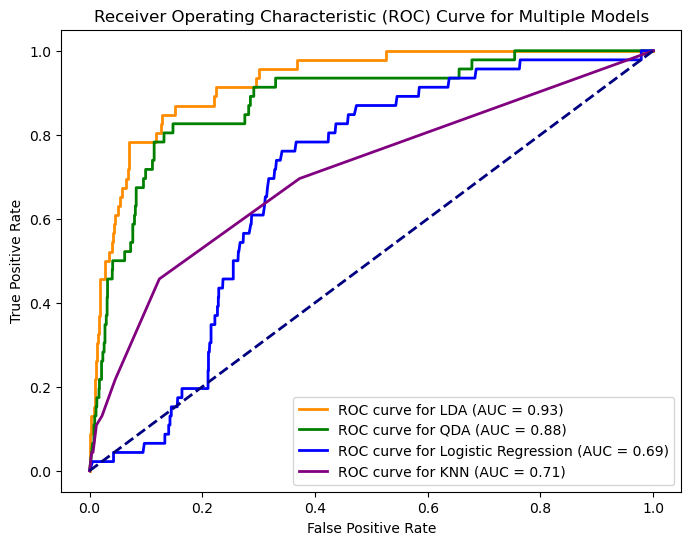

In [134]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming lda_model is your trained Linear Discriminant Analysis (LDA) model
lda_scores = lda_model.predict_proba(x_test)[:, 1]
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_scores)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# Assuming qda_model is your trained Quadratic Discriminant Analysis (QDA) model
qda_scores = qda_model.predict_proba(x_test)[:, 1]
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, qda_scores)
roc_auc_qda = auc(fpr_qda, tpr_qda)

# Assuming logreg_model is your trained logistic regression model from scikit-learn
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_scores = logreg_model.predict_proba(x_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_scores)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Assuming knn_model is your trained KNN model with the chosen value of K
knn_scores = knn_model.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_scores)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='ROC curve for LDA (AUC = {:.2f})'.format(roc_auc_lda))
plt.plot(fpr_qda, tpr_qda, color='green', lw=2, label='ROC curve for QDA (AUC = {:.2f})'.format(roc_auc_qda))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='ROC curve for Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='ROC curve for KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiple Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()
